In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
from skimage import io, color

## **1. [30] Image Histogram**
### Diberikan dua buah kelas citra yaitu kelas hutan dan juga lautan yang terdiri dari masing-masing 4 citra untuk kedua kelas.

<img src="Tugas Lab 6 Images\gambar\histogram\forest1.jpg" width=600px>  <img src="Tugas Lab 6 Images\gambar\histogram\sea1.jpg" width=500px>

### Lakukan pengklasifikasian kedua buah citra ke dalam kelas yang sesuai dengan menggunakan fitur image histogramnya.

### a. [20] Buatlah method predict yang menerima parameter nama_file dan mengembalikan output “hutan” untuk citra yang tergolong sebagai hutan dan lautan untuk citra yang tergolong sebagai lautan. Method predict yang dibuat **wajib** menggunakan fitur berupa image histogram. Pengecekan dan ekstraksi fitur yang dilakukan pada setiap citra harus di automasi, **tidak boleh di-hardcode** untuk tiap citra.

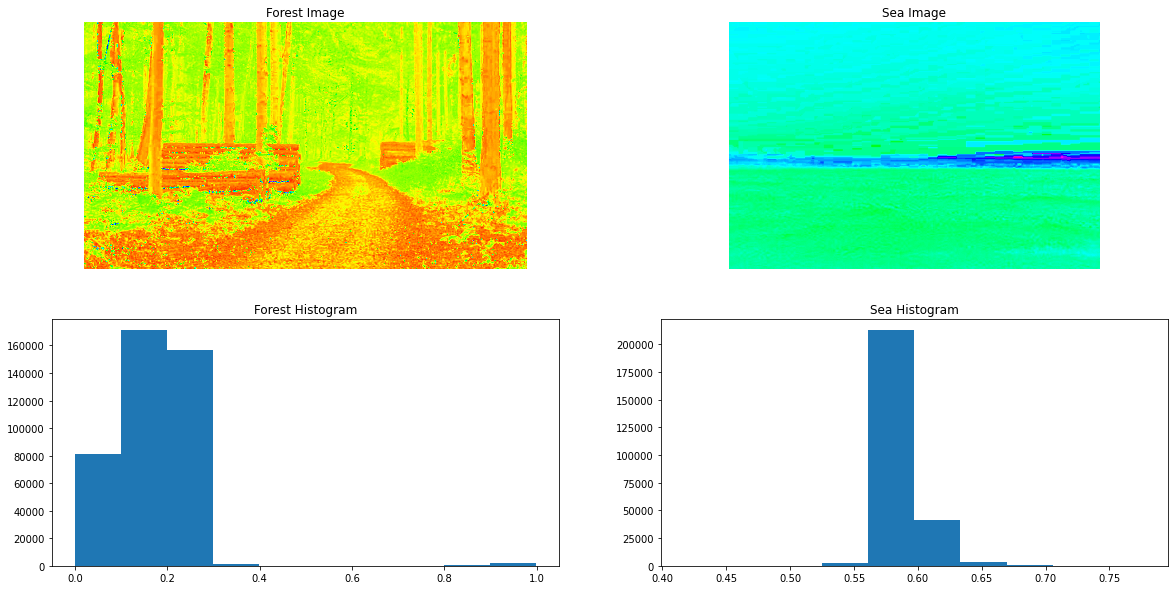

Forest Hue < 0.5:  410242
Forest Hue >= 0.5:  2558
Sea Hue < 0.5:  2
Sea Hue >= 0.5:  261040


In [2]:
"""Proses Mencari Feature"""

forest = io.imread("Tugas Lab 6 Images/gambar/histogram/forest1.jpg")
sea = io.imread("Tugas Lab 6 Images/gambar/histogram/sea1.jpg")

# Convert to HSV
forestHSV = color.rgb2hsv(forest)
seaHSV = color.rgb2hsv(sea)

# Get Hue Channel
forestH = forestHSV[:, :, 0]
seaH = seaHSV[:, :, 0]

# Show image
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1); plt.title('Forest Image'); plt.imshow(forestH, cmap="hsv"); plt.axis('off')
plt.subplot(2, 2, 2); plt.title('Sea Image'); plt.imshow(seaH, cmap="hsv"); plt.axis('off')
plt.subplot(2, 2, 3); plt.title('Forest Histogram'); plt.hist(forestH.flatten());
plt.subplot(2, 2, 4); plt.title('Sea Histogram'); plt.hist(seaH.flatten());
plt.show()

print("Forest Hue < 0.5: ", (forestH.flatten() < 0.5).sum())
print("Forest Hue >= 0.5: ", (forestH.flatten() >= 0.5).sum())
print("Sea Hue < 0.5: ", (seaH.flatten() < 0.5).sum())
print("Sea Hue >= 0.5: ", (seaH.flatten() >= 0.5).sum())

In [3]:
def predict(file_name):
    img = io.imread(file_name)
    hue = color.rgb2hsv(img)[:, :, 0].flatten()
    hueL = (hue < 0.5).sum()
    hueH = (hue >= 0.5).sum()
    # lebih banyak hue rendah, prediksi sebagai hutan
    if hueL > hueH:
        return 'hutan'
    else:
        return 'laut'

folder = 'Tugas Lab 6 Images/gambar/histogram'
for filename in os.listdir(folder):
    filename = f'{folder}/{filename}'
    print(f'image {filename} predicted as {predict(filename)}')

image Tugas Lab 6 Images/gambar/histogram/forest1.jpg predicted as hutan
image Tugas Lab 6 Images/gambar/histogram/forest2.jpg predicted as hutan
image Tugas Lab 6 Images/gambar/histogram/forest3.jpg predicted as hutan
image Tugas Lab 6 Images/gambar/histogram/forest4.jpg predicted as hutan
image Tugas Lab 6 Images/gambar/histogram/sea1.jpg predicted as laut
image Tugas Lab 6 Images/gambar/histogram/sea2.jpg predicted as laut
image Tugas Lab 6 Images/gambar/histogram/sea3.jpg predicted as laut
image Tugas Lab 6 Images/gambar/histogram/sea4.jpg predicted as laut


### b. [10] Jelaskan fitur yang telah Anda buat pada bagian a dan alasan Anda memilih fitur tersebut.

Fitur yang dipilih untuk memprediksi apakah suatu citra merupakan hutan atau laut adalah banyaknya Hue yang kurang atau lebih dari 0.5 dari citra yang bersangkutan setelah diubah menjadi citra HSV. Feature Hue citra digunakan karena dalam menentukan hutan atau laut lebih mudah menggunakan warna dan Channel Hue pada HSV menentukan warna dari suatu pixel. Berdasarkan proses pencarian fitur pada bagian a, didapat bahwa citra forest memiliki hue yang banyak di bawah nilai 0.5. Sedangkan, pada citra sea sebagian besar hue terdapat diatas 0.5. Sehingga branching yang dipilih untuk prediksi berdasarkan nilai Hue kurang atau lebih dari 0.5.

## **2. [30] Hough Transformation**
### Diberikan dua buah kelas citra yaitu kelas segitiga siku siku dan juga segitiga sama sisi yang terdiri dari masing-masing 4 citra untuk kedua kelas. (Asumsikan posisi segitiga yang mungkin hanya sesuai citra yang diberikan pada dataset, tidak ada miring 10° atau semacamnya)
<img src="Tugas Lab 6 Images\gambar\segitiga\siku siku 1.jpg" width=400px> <img src="Tugas Lab 6 Images\gambar\segitiga\sama sisi 1.jpg" width=430px>

### a. [20] Gunakan hasil hough transformation yang telah didapatkan sebagai fitur untuk mengklasifikasikan apakah citra tersebut merupakan segitiga siku siku atau segitiga sama sisi. Manfaatkan variabel theta yang ada pada template lab untuk menentukannya. Anda dapat menggunakan cv2.HoughLines seperti yang dijabarkan pada tutorial.

> (Hint: Cek dalam skala apa theta dikembalikan oleh fungsi HoughLines)


Theta Sama Sisi: {-30.0, 90.0, 30.0}
Theta Siku Siku: {0.0, 90.0, 45.0}


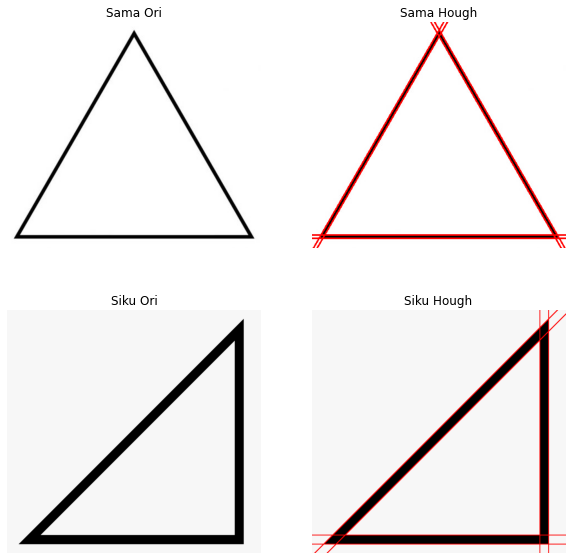

In [4]:
sama = cv2.imread('Tugas Lab 6 Images/gambar/segitiga/sama sisi 1.jpg')
sama_ori = np.copy(sama)

siku = cv2.imread('Tugas Lab 6 Images/gambar/segitiga/siku siku 1.jpg')
siku_ori = np.copy(siku)

def process(img):
    thetas = set()
    # convert image to gray
    gray = (color.rgb2gray(img) * 255).astype(np.uint8)
    # find all of the edges using canny
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    # find all of the lines using hough transformation
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
    # plotting line
    for line in lines:
        for rho, theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img, (x1,y1), (x2,y2), (255,0,0), 2)
            # Convert theta to degrees
            res = np.round(theta * 180/np.pi)
            # Add theta to set
            thetas.add(res if res <= 90 else res - 180)
    return thetas

print("Theta Sama Sisi:", process(sama))
print("Theta Siku Siku:", process(siku))

# Show image
plt.figure(figsize=(10,10))

plt.subplot(2,2,1); plt.title('Sama Ori'); plt.imshow(sama_ori); plt.axis('off')
plt.subplot(2,2,2); plt.title('Sama Hough'); plt.imshow(sama); plt.axis('off')
plt.subplot(2,2,3); plt.title('Siku Ori'); plt.imshow(siku_ori); plt.axis('off')
plt.subplot(2,2,4); plt.title('Siku Hough'); plt.imshow(siku); plt.axis('off')
plt.show()


In [5]:
def predict2(file_name):
    img = cv2.imread(file_name)
    thetas = process(img)
    angles = set()

    # Get all angles inside the triangle
    for theta in thetas:
        for other in thetas.difference([theta]):
            diff = np.absolute(theta - other)
            angles.add(diff if diff < 90 else 180 - diff)

    if angles == {60.0}:
        return "Sama Sisi"
    elif angles == {45.0, 90.0}:
        return "Siku Siku"
    else:
        return "Sembarang/Bukan Segitiga"

folder = 'Tugas Lab 6 Images/gambar/segitiga'
for filename in os.listdir(folder):
    filename = f'{folder}/{filename}'
    print(f'image {filename} predicted as {predict2(filename)}')

image Tugas Lab 6 Images/gambar/segitiga/sama sisi 1.jpg predicted as Sama Sisi
image Tugas Lab 6 Images/gambar/segitiga/sama sisi 2.jpg predicted as Sama Sisi
image Tugas Lab 6 Images/gambar/segitiga/sama sisi 3.jpg predicted as Sama Sisi
image Tugas Lab 6 Images/gambar/segitiga/sama sisi 4.jpg predicted as Sama Sisi
image Tugas Lab 6 Images/gambar/segitiga/siku siku 1.jpg predicted as Siku Siku
image Tugas Lab 6 Images/gambar/segitiga/siku siku 2.jpg predicted as Siku Siku
image Tugas Lab 6 Images/gambar/segitiga/siku siku 3.jpg predicted as Siku Siku
image Tugas Lab 6 Images/gambar/segitiga/siku siku 4.jpg predicted as Siku Siku


### b. [10] Jelaskan lebih detail tentang parameter yang anda gunakan sebagai argumen dan fitur yang Anda ekstraksi pada bagian a dan.

Untuk mengidentifikasi Segitiga Sama Sisi atau Segitiga Siku Siku, dicari sudut antara dua garis pada segitiga. Pertama akan diambil theta dari tiap garis yang unik. Kemudian, untuk setiap theta yang ada, akan diambil perbedaannya sehingga didapat sudut yang diapit oleh kedua garis. Terakhir, dilakukan pengecekan apakah sudut-sudut yang diapit termasuk pada sudut yang ada pada segitiga sama sisi, segitiga siku siku, atau bahkan bukan keduanya. 

## **3.  [40] Template Matching**
### Diberikan citra ‘pertandingan 1.jpg’, ‘pertandingan 2.jpg’ dan ‘bola.jpg’

<img src="Tugas Lab 6 Images\gambar\template matching\pertandingan 1.jpeg" width=500px>  <img src="Tugas Lab 6 Images\gambar\template matching\pertandingan 2.jpeg" width=550px>  <img src="Tugas Lab 6 Images\gambar\template matching\bola.jpg">

### a. [15] Lakukan dan tampilkan hasil template matching dengan berbagai threshold pada kedua gambar! Anda bisa menggunakan library OpenCV/Skimage/lainnya.

In [6]:
# Import citra yang dibutuhkan
p1 = cv2.cvtColor(cv2.imread('Tugas Lab 6 Images/gambar/template matching/pertandingan 1.jpeg'), cv2.COLOR_BGR2RGB)
p2 = cv2.cvtColor(cv2.imread('Tugas Lab 6 Images/gambar/template matching/pertandingan 2.jpeg'), cv2.COLOR_BGR2RGB)
template = cv2.cvtColor(cv2.imread('Tugas Lab 6 Images/gambar/template matching/bola.jpg'), cv2.COLOR_BGR2RGB)

def template_match(img, template, threshold):
    # Ubah gray
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)

    # Menyimpan width dan height template
    w, h = template_gray.shape[::-1]

    # Apply template matching
    # parameter ketiga merupakan method, bisa melihat dokumentasi openCV untuk penjelasan lebih lanjut dan pilihan method lainnya
    res = cv2.matchTemplate(img_gray, template_gray, cv2.TM_CCOEFF_NORMED)

    # Copy citra Original untuk ditandai bounding box
    template_matched = img.copy()

    loc = np.where(res >= threshold)

    # Buat bounding box dengan rectangle. Rectangle memiliki 4 parameter yaitu (image, start_point, end_point, color, thickness)
    for point in zip(*loc[::-1]):
        cv2.rectangle(template_matched, point, (point[0] + w, point[1] + h), (255,0,0), 2)

    # Menampilkan citra
    plt.figure(figsize=(20,10))

    plt.subplot(131),plt.imshow(img); plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(template); plt.title('Template Bola'), plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(template_matched); plt.title('Template Matched'), plt.xticks([]), plt.yticks([])
    plt.show()

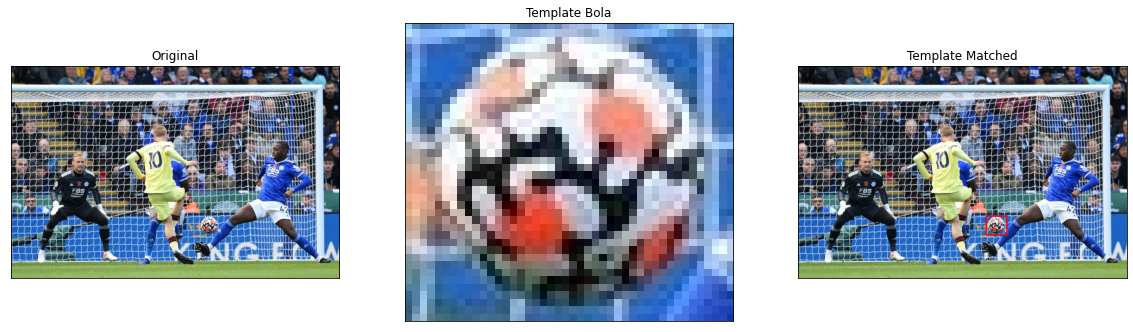

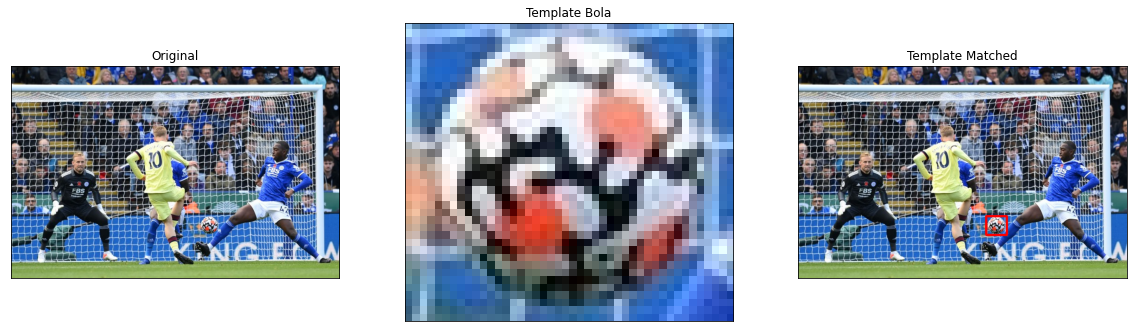

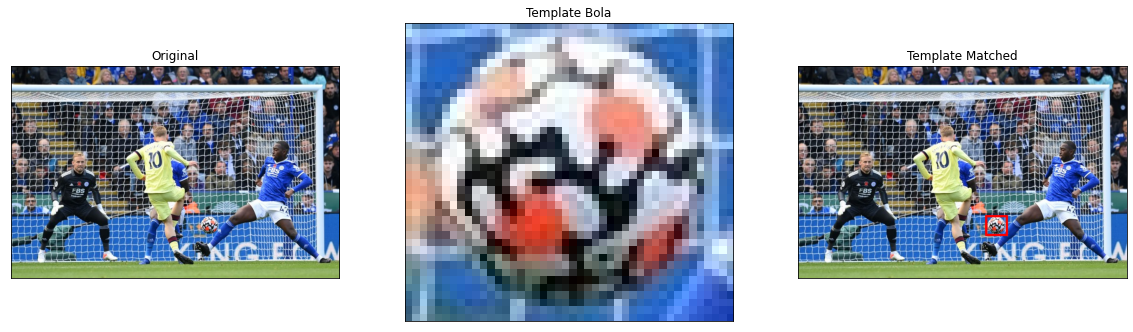

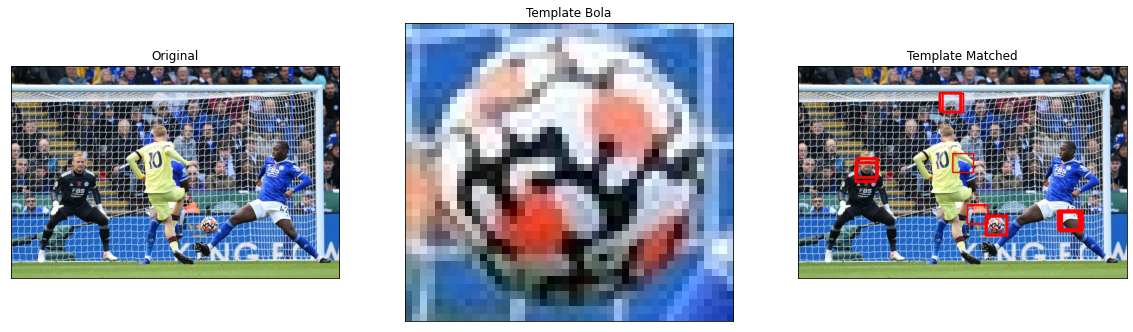

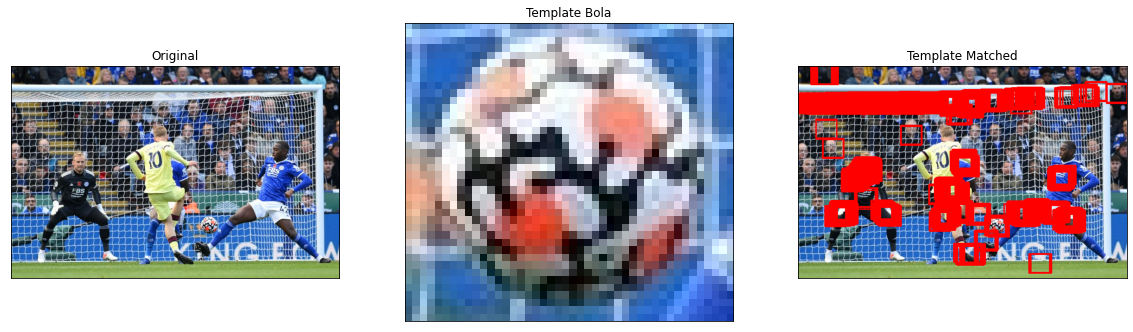

In [7]:
"""Pertandingan 1"""
template_match(p1, template, 0.9)
template_match(p1, template, 0.7)
template_match(p1, template, 0.5)
template_match(p1, template, 0.4)
template_match(p1, template, 0.3)

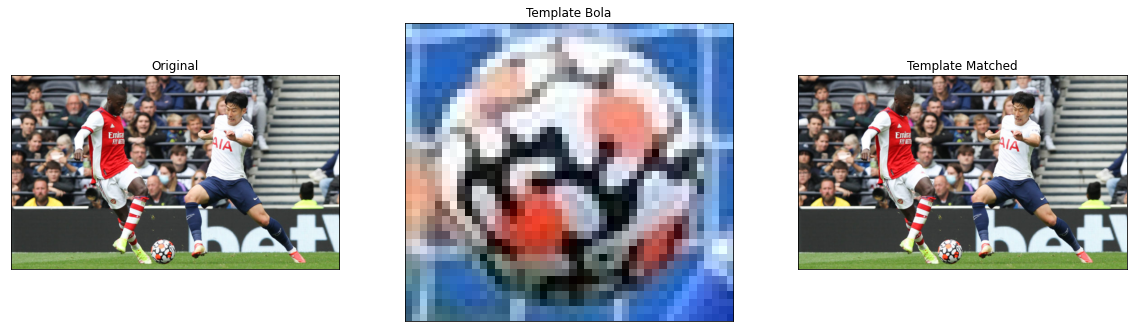

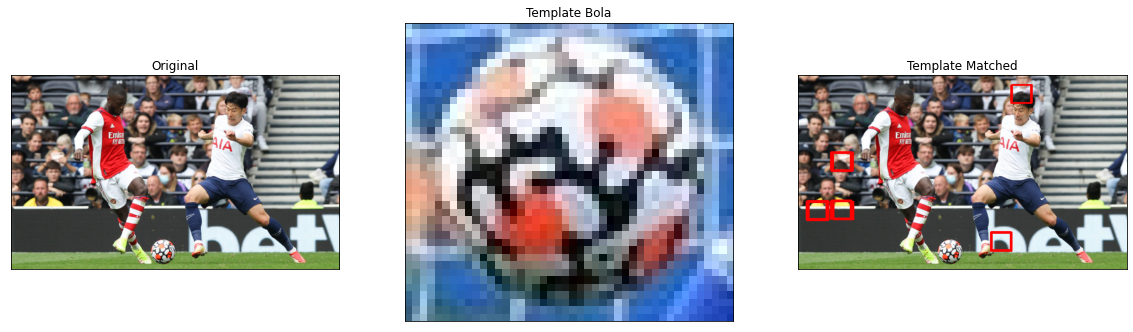

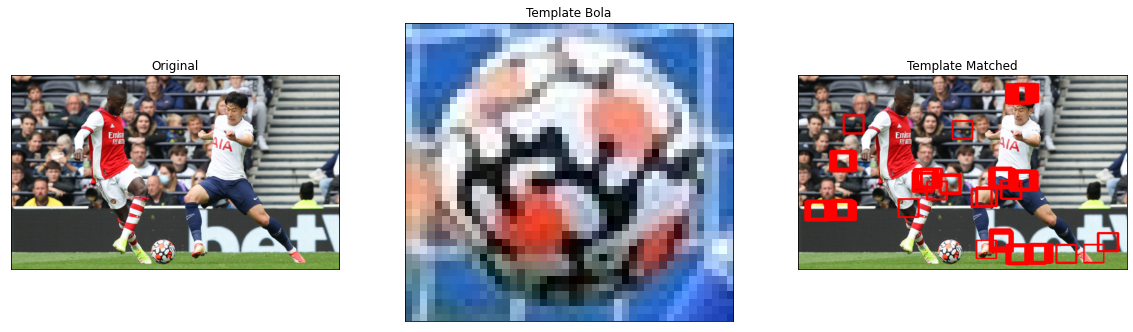

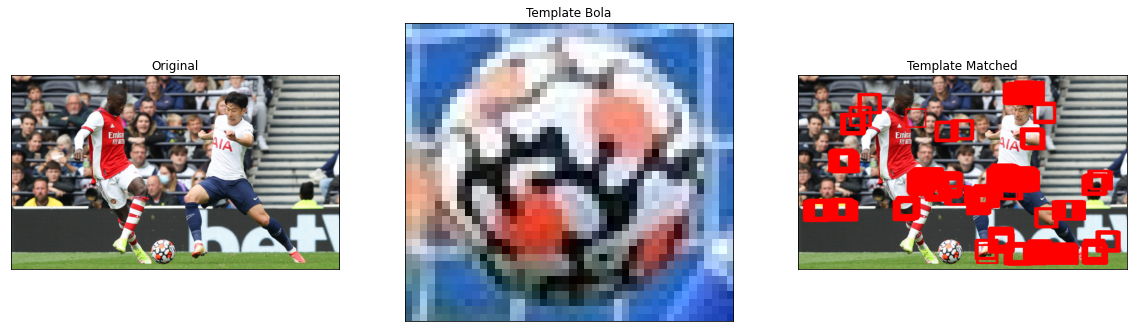

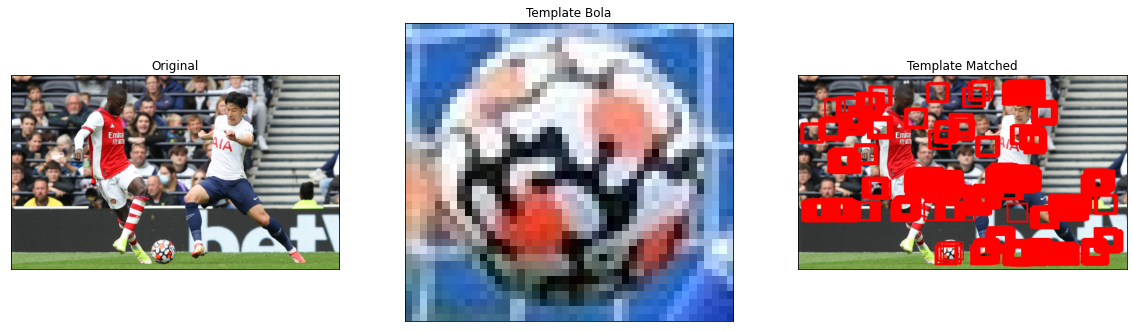

In [8]:
"""Pertandingan 2"""
template_match(p2, template, 0.5)
template_match(p2, template, 0.45)
template_match(p2, template, 0.4)
template_match(p2, template, 0.35)
template_match(p2, template, 0.3)

### b. [15] Berdasarkan eksplorasi di poin a, perbedaan apa yang Anda temukan? Mengapa perbedaan ini terjadi?

Pada bagian A, citra pertandingan 1 dengan threshold 0.9 langsung didapatkan Bola. Sedangkan pada citra pertandingan 2, hingga threshold 0.35 pun tidak didapat Bola. Citra pertama dapat langsung mendapatkan Bola karena citra Bola merupakan bagian dari citra pertandingan 1. Untuk citra kedua, terjadi kesulitan untuk mendapatkan match. Hal ini dikarenakan citra template memang tidak ada dalam citra pertandingan 2. Hal lain yang dapat mempengaruhi ialah backgraound dari template. Dengan mengurangi threshold, background pada template makin menyulitkan matching pada citra pertandingan 2. Sehingga, jika dilihat pada bagian A, objek-objek yang bukan merupakan bola malah dianggap sama dengan bola (template).

### c. [10] Menurut Anda, apakah kelebihan dan kekurangan metode fitur ekstraksi ini? Apakah untuk kasus template matching untuk bola pada gambar pertandingan sepak bola cocok?

Fitur ekstraksi ini sangat baik apabila kita memiliki potongan suatu citra, kemudian kita ingin mendapatkan citra lengkapnya. Fitur ini juga baik jika kita ingin bermain [Where's Waldo (Wally)](https://en.wikipedia.org/wiki/Where%27s_Wally%3F). Fitur ini kurang baik jika template bukan merupakan bagian dari suatu citra aslinya. Seperti yang dilihat pada citra pertandingan 2, terjadi kesulitan dalam mendapatkan match bola pada citra tersebut. Sehingga, dalam mengindentifikasi objek pada citra lain kurang baik.